# Importing necessary dependencies

In [29]:
import pandas as pd
import calendar, matplotlib.pyplot as plt

In [30]:
acled = pd.read_csv("acled_clean.csv", parse_dates=["event_date"])
acled.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,inter1,interaction,...,admin2,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,USA23310,2020-01-01,2020,1,Demonstrations,Protests,Peaceful protest,Protesters (United States),Protesters,Protesters only,...,Cuyahoga,Cleveland,41.4822,-81.6697,1,WKYC Studios; Crowd Counting Consortium,Other-Subnational,"On 1 January 2020, an unknown number of people...",0,1612546518
1,USA23416,2020-01-01,2020,1,Demonstrations,Protests,Peaceful protest,Protesters (United States),Protesters,Protesters only,...,Monroe,Rochester,43.1547,-77.6155,1,13WHAM ABC; Democrat and Chronicle; 10NBC,Subnational,"On 1 January 2020, people held a peace march o...",0,1612546518
2,USA23636,2020-01-01,2020,1,Demonstrations,Protests,Peaceful protest,Protesters (United States),Protesters,Protesters only,...,Maricopa,Phoenix,33.4492,-112.0741,1,Count Love; Channel 12 (Mesa),Other-Subnational,"On 1 January 2020, a group of people gathered ...",0,1612546518
3,USA23414,2020-01-01,2020,1,Demonstrations,Protests,Peaceful protest,Protesters (United States),Protesters,Protesters only,...,New York,New York - Manhattan,40.7834,-73.9663,1,CBS2 (New York),Subnational,"On 1 January 2020, protesters gathered at NYPD...",0,1753970861
4,USA23635,2020-01-01,2020,1,Demonstrations,Protests,Peaceful protest,Protesters (United States),Protesters,Protesters only,...,Alameda,Oakland,37.8044,-122.2711,1,KTVU Fox2,Subnational,"On 1 January 2020, a group of people gathered ...",0,1612546519


# Ensuring correct datatypes are loaded

In [31]:
acled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89373 entries, 0 to 89372
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id_cnty   89373 non-null  object        
 1   event_date      89373 non-null  datetime64[ns]
 2   year            89373 non-null  int64         
 3   time_precision  89373 non-null  int64         
 4   disorder_type   89373 non-null  object        
 5   event_type      89373 non-null  object        
 6   sub_event_type  89373 non-null  object        
 7   actor1          89373 non-null  object        
 8   inter1          89373 non-null  object        
 9   interaction     89373 non-null  object        
 10  iso             89373 non-null  int64         
 11  region          89373 non-null  object        
 12  country         89373 non-null  object        
 13  admin1          89373 non-null  object        
 14  admin2          89373 non-null  object        
 15  lo

# EDA

## What is the distribution of these events on a monthly basis?

In [32]:
monthly_dataset = pd.DataFrame()
monthly_dataset["year"] = acled["event_date"].dt.year
monthly_dataset["month"] = acled["event_date"].dt.month

In [33]:
monthly_dataset = (
    monthly_dataset.dropna(subset=["year", "month"])
                   .astype({"year": "int64", "month": "int64"})
)

In [34]:
monthly_counts = (
    monthly_dataset.groupby(["year", "month"])
                   .size()
                   .rename("events")
                   .reset_index()
)

In [35]:
monthly_counts

,year,month,events
0,2020,1,1175
1,2020,2,706
2,2020,3,412
3,2020,4,587
4,2020,5,2177
...,...,...,...
65,2025,6,2752
66,2025,7,1606
67,2025,8,1016
68,2025,9,1327


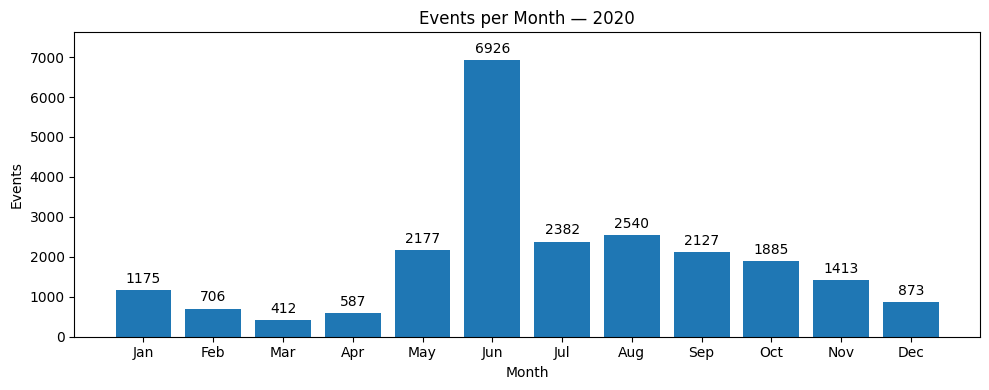

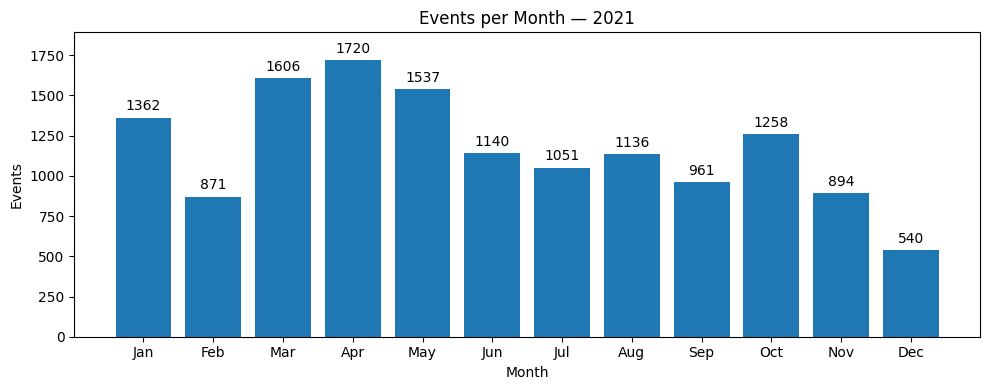

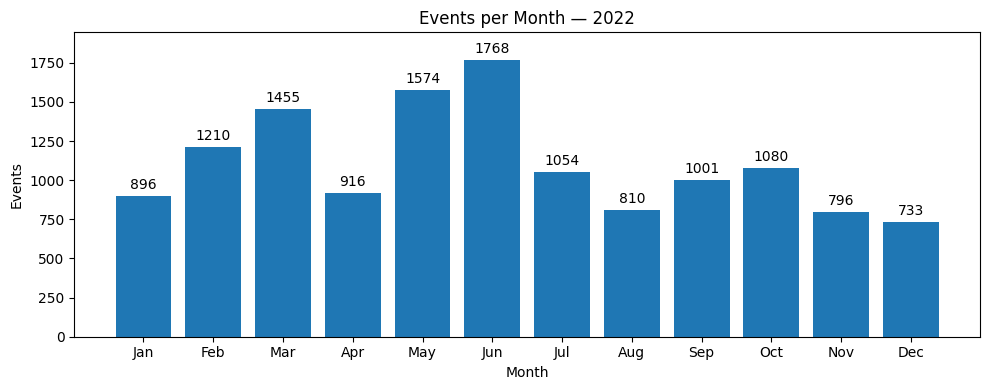

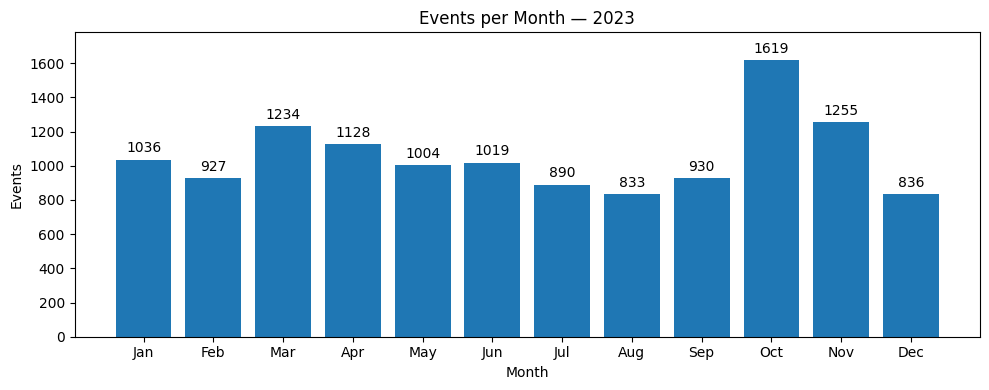

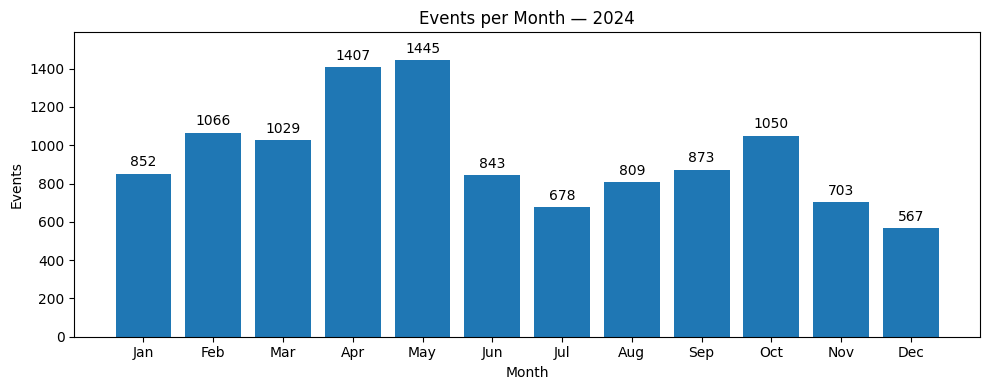

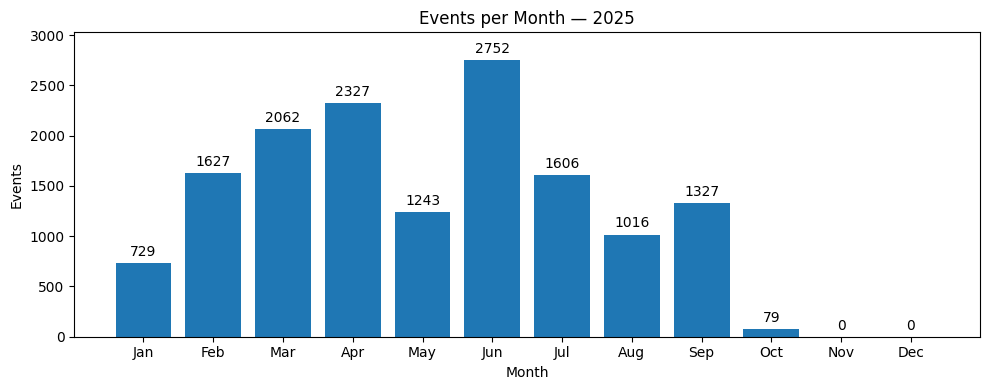

In [39]:
wide = (monthly_counts.pivot(index="year", columns="month", values="events")
                     .reindex(columns=range(1,13), fill_value=0)
                     .fillna(0))

for yr, row in wide.iterrows():
    plt.figure(figsize=(10,4))
    bars = plt.bar(range(1,13), row.values)  # capture the BarContainer

    # add a little headroom so labels don’t clip
    ymax = row.values.max() if len(row.values) else 0
    plt.ylim(0, ymax * 1.10 if ymax > 0 else 1)

    # add value labels on top of each bar
    try:
        # Matplotlib ≥ 3.4
        plt.gca().bar_label(bars, fmt="%.0f", padding=3)
    except Exception:
        # fallback for older versions
        for b in bars:
            h = b.get_height()
            if h > 0:
                plt.annotate(f"{int(h)}",
                             (b.get_x() + b.get_width()/2, h),
                             xytext=(0, 3), textcoords="offset points",
                             ha="center", va="bottom", fontsize=9)

    plt.xticks(range(1,13), [calendar.month_abbr[m] for m in range(1,13)])
    plt.title(f"Events per Month — {yr}")
    plt.xlabel("Month"); plt.ylabel("Events")
    plt.tight_layout()
    plt.show()


# How many counties does this data cover? For each year, what counties are covered and the total events per county?

In [42]:
acled.admin2.unique()

array(['Cuyahoga', 'Monroe', 'Maricopa', ..., 'Morrison', 'Bolivar',
       'Oregon'], shape=(1349,), dtype=object)

In [43]:
len(acled.admin2.unique())

1349

##### There are approximately 3143 counties in the US, out of which 1349 counties are covered in the dataset.